In [35]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
# Cargamos los datos de entrada y vemos cuantas filas y columnas tiene
df = pd.read_csv('data/articulos_ml.csv')
df.shape

(161, 8)

In [37]:
# Vemos los primeros registros
df.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [38]:
# Veamos algunas estadísticas de nuestros datos
df.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


La media de palabras es de 1808. El artículo más corto tiene 250 palabras y el más largo 8401. Intentaremos ver con nuestra relación lineal si hay una correlación entre la cantidad de palabras de un texto y la cantidad de Shares obtenidos

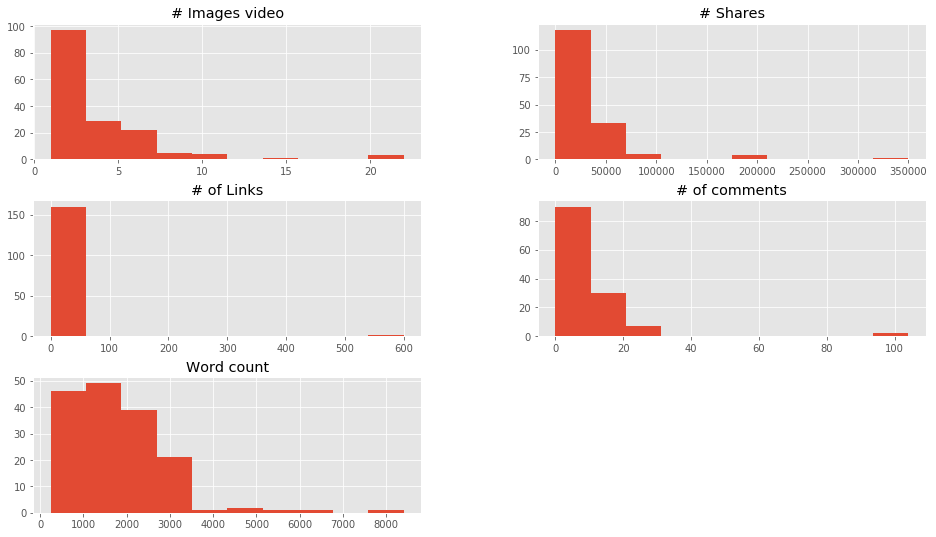

In [39]:
# Visualizamos los datos de entrada
df.drop(['Title', 'url', 'Elapsed days'],1).hist()
plt.show()

En estas gráficas vemos entre qué valores se concentran la mayoría de registros.

Vamos a filtrar los datos de cantidad de palabras para quedarnos con los registros con menos de 3500 palabras y también con los que tengan Cantidad de compartidos menos a 80.000. Lo gratificaremos pintando en azul los puntos con menos de 1808 palabras (la media) y en naranja los que tengan más.

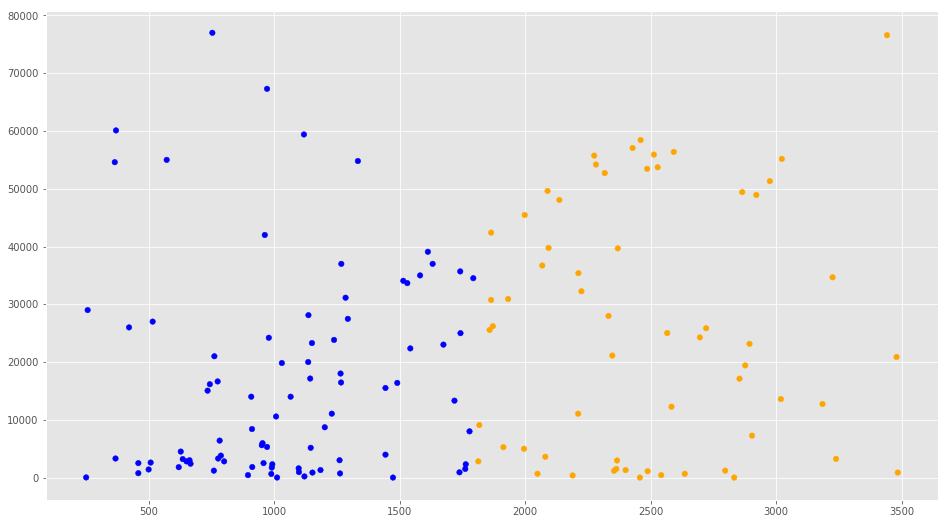

In [40]:
# Recortamos los datos en las zonas donde se concentran más los puntos 
# Esto es en el eje X entre 0 y 3500. En el eje Y entre 0 y 80.000
filtered_data = df[(df['Word count'] <= 3500) & (df['# Shares'] <= 80000)]

colores = ['orange', 'blue']
tamanios = [30, 60]

f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values

# Pintamos en colores los puntos por encima y por debajo de la media de la cantidad de palabras

asignar = []
for index, row in filtered_data.iterrows():
    if(row['Word count'] > 1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()
            
    




## Regresión lineal con SKLearn

In [41]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y
dataX = filtered_data[['Word count']]
X_train = np.array(dataX)
y_train = filtered_data['# Shares'].values

# Creamos el objeto de regresión lineal
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones 
y_pred = regr.predict(X_train)

# Vemos los coeficientes obtenidos, en nuestro caso serán la tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))


('Coefficients: \n', array([5.69765366]))
('Independent term: \n', 11200.303223074157)
Mean squared error: 372888728.34
Variance score: 0.06


El puntaje de varianza debería ser cercano a 1, y el error cuadrático medio es muy alto por lo tanto el modelo no será muy bueno

Comprobamos nuestro algoritmo, por ejemplo queriendo predecir cuantos Shares tendrá un artículo con 1500 palabras

In [42]:
y_milquinientas = regr.predict([[1500]])
print(int(y_milquinientas))

19746


## Regresión con múltiples variables


Extenderemos el ejercicio utilizando más de una variable de entrada para el modelo. De esta manera el algoritmo de Machine Learning podra hacer predicciones mas complejas.
Nuestra 'Ecuación de la recta' ahora pasa a ser: Y = b + m1 X1 + m2 X2 + ... + m(n) X(n)    (y deja de ser una recta)

En nuestro caso utilizaremos dos variables predictivas para poder graficar en 3D, pero para mejores predicciones podriamos usar mas de dos entradas y prescindir del gráfico

In [43]:
suma = (filtered_data['# of Links'] + filtered_data['# of comments'].fillna(0) + filtered_data['# Images video'])

dataX2 = pd.DataFrame()
dataX2['Word count'] = filtered_data['Word count']
dataX2['suma'] = suma
XY_train = np.array(dataX2)
z_train = filtered_data['# Shares'].values

Ya tenemos nuestras dos variables de entrada en XY_train y nuestra variable de salida pasa de ser 'Y' a ser el eje 'Z'.
Creamos un nuevo objeto de Regresión Lineal con SKLearn pero esta vez tendrá que entrenar las dos dimensiones que tiene XY_train. Imprimimos los coeficientes y puntajes obtenidos.

In [44]:
# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()
# Entrenamos el modelo, esta vez con dos dimensiones
# Obtenemos dos coeficientes para graficar un plano
regr2.fit(XY_train, z_train)
# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)

# Los coeficientes
print('Coefficients: \n', regr2.coef_)

# Error cuadrático medio
print('Mean squared error: %.2f' %mean_squared_error(z_train, z_pred))
 
# Evaluamos el porcentaje de varianza
print('Variance score: %.2f' %r2_score(z_train, z_pred))

('Coefficients: \n', array([   6.63216324, -483.40753769]))
Mean squared error: 352122816.48
Variance score: 0.11


Obtuimos 2 coeficientes (cada uno correspondiente a nuestras dos variables predictivas), 
El error obtenido sigue siendo grande, y el porcentaje de varianza aunque mejoró todavia queda muy lejos de ser bueno.

## Visualización de un plano de 3 dimensiones

Graficaremos nuestros puntos de las características de entrada en color azul y los puntos proyectados en el plano en rojo. Recordemos que en esta gráfica el eje Z corresponde a la altura y representa la cantidad de Shares que obtendremos

Text(0.5,0.92,'Regresion Lineal con Multiples Variables')

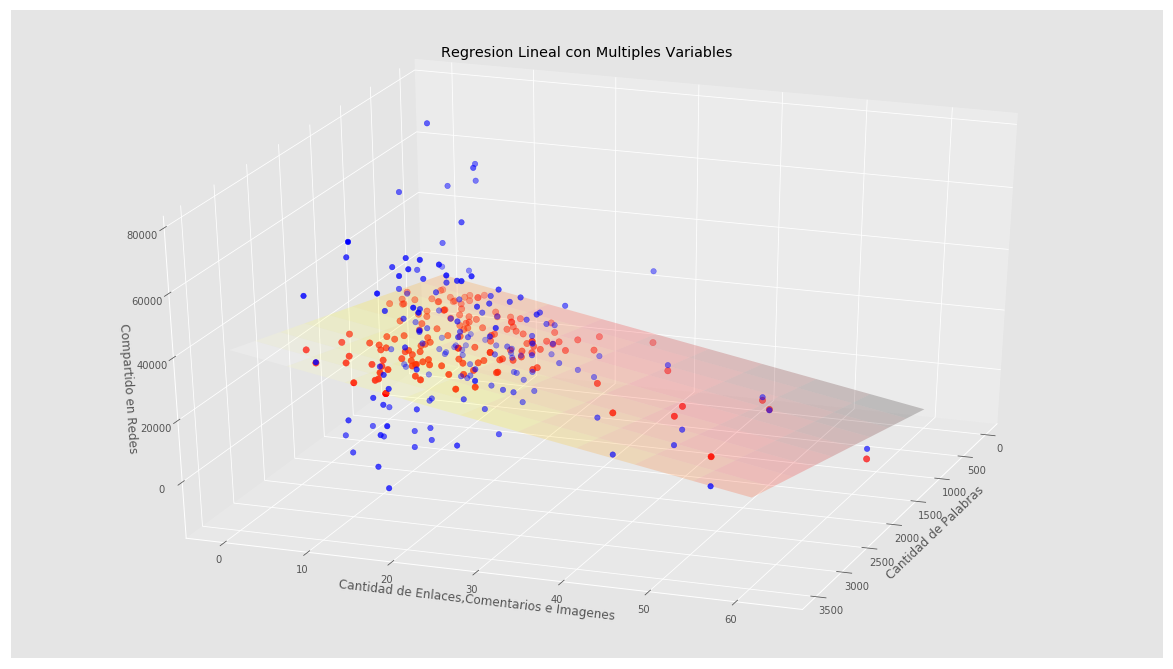

In [50]:
fig = plt.figure()
ax = Axes3D(fig)

# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))

# calculamos los valores del plano para los puntos x e y
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy) 

# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + regr2.intercept_)

# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')

# Graficamos os puntos
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=30)

ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=40)

# con esto situamos la "cámara" con la que visualizamos
ax.view_init(elev=30., azim=20)
        
ax.set_xlabel('Cantidad de Palabras')
ax.set_ylabel('Cantidad de Enlaces,Comentarios e Imagenes')
ax.set_zlabel('Compartido en Redes')
ax.set_title('Regresion Lineal con Multiples Variables')

Si quiero predecir cuantos Shares voy a obtener por un artículo con 1500 palabras, 10 enlaces, 6 comentarios y 9 imágenes, según este modelo debería hacerlo de la siguiente manera:

In [51]:
z_milquinientas = regr2.predict([[1500, 10+6+9]])
print(int(z_milquinientas))

14784
